# Initial visualizations of the dataset


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Create folder where the graphs will be saved:


In [12]:
path = "../Graphs/dataset/full"

try:
    if not os.path.exists(path):
        os.makedirs(path)
except OSError:
    print("Making path {path} failed")

Read in the data:


In [13]:
df = pd.read_csv("../Data/CVD_cleaned.csv")

Show the data and their types:


In [14]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


For every numerical column we create a histogram of the data:


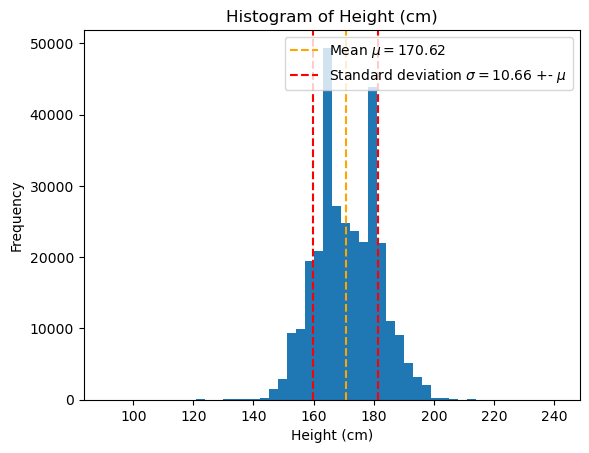

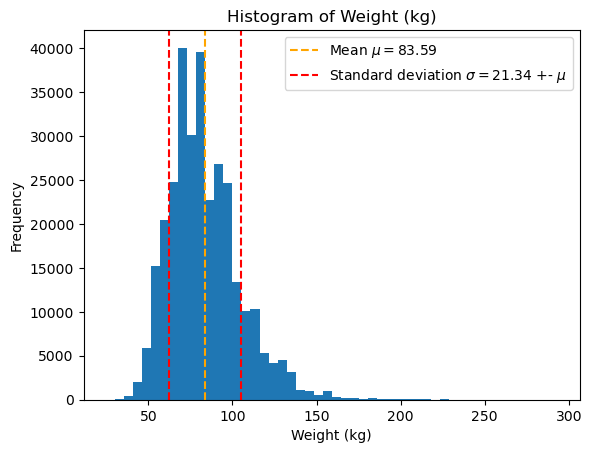

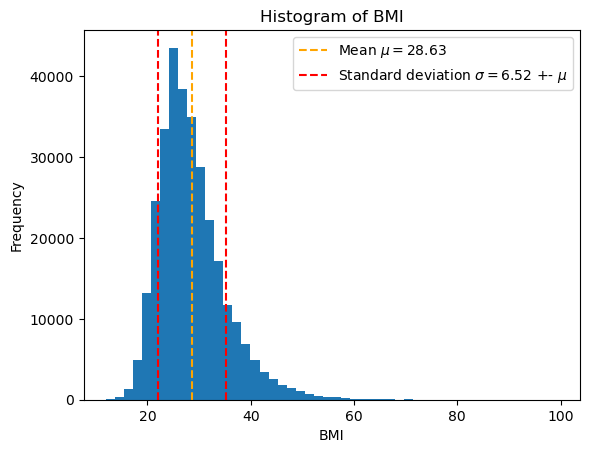

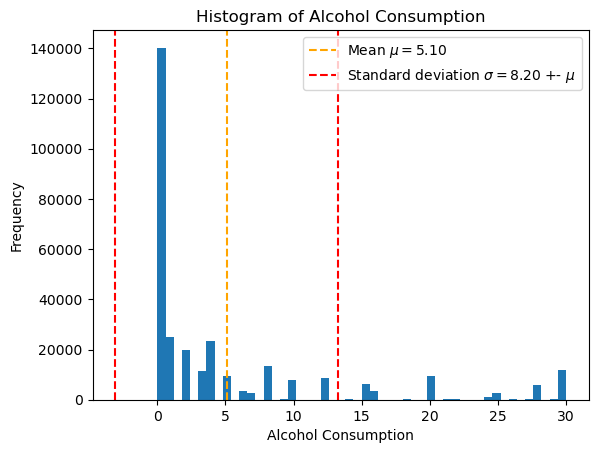

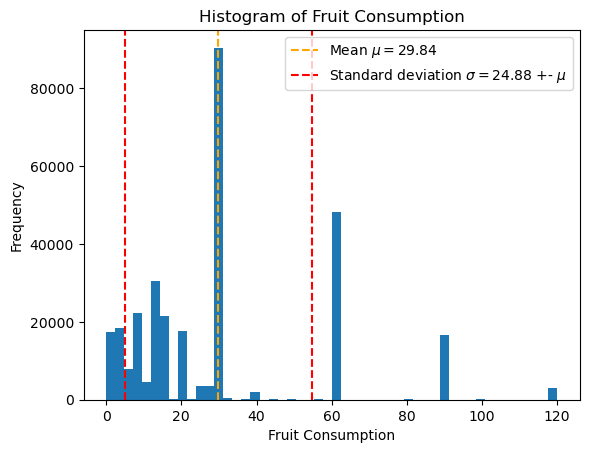

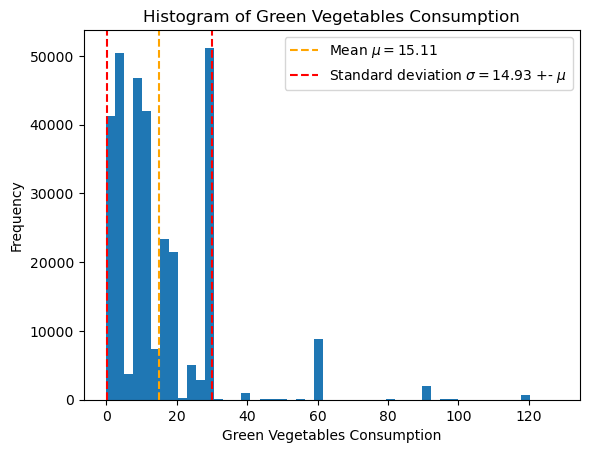

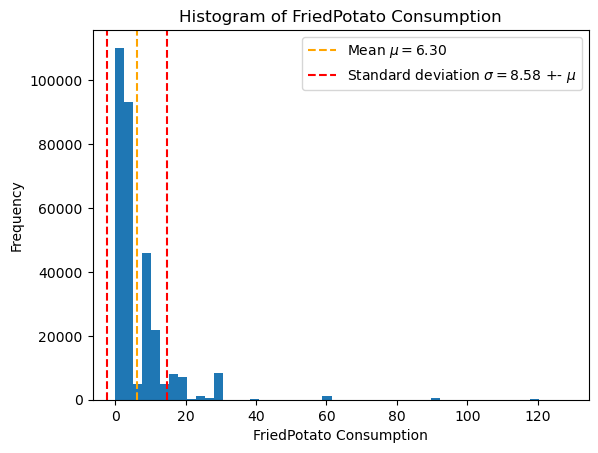

In [15]:
numerical_columns = [
    "Height_(cm)",
    "Weight_(kg)",
    "BMI",
    "Alcohol_Consumption",
    "Fruit_Consumption",
    "Green_Vegetables_Consumption",
    "FriedPotato_Consumption",
]

for numerical_column in numerical_columns:
    label = " ".join(numerical_column.split("_"))
    plt.hist(df[numerical_column], bins=50)
    plt.title(f"Histogram of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.axvline(
        np.mean(df[numerical_column]),
        color="orange",
        linestyle="--",
        label=rf"Mean $\mu=${np.mean(df[numerical_column]):.2f}",
    )
    plt.axvline(
        np.std(df[numerical_column]) + np.mean(df[numerical_column]),
        color="red",
        linestyle="--",
        label=rf"Standard deviation $\sigma=${np.std(df[numerical_column]):.2f} +- $\mu$",
    )
    plt.axvline(
        np.mean(df[numerical_column]) - np.std(df[numerical_column]),
        color="red",
        linestyle="--",
    )
    plt.legend()
    plt.savefig(f"{path}{numerical_column}_histogram.png", dpi=300)

    plt.show()

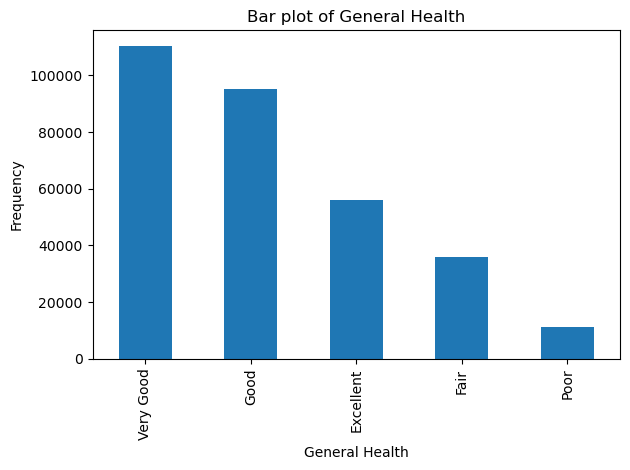

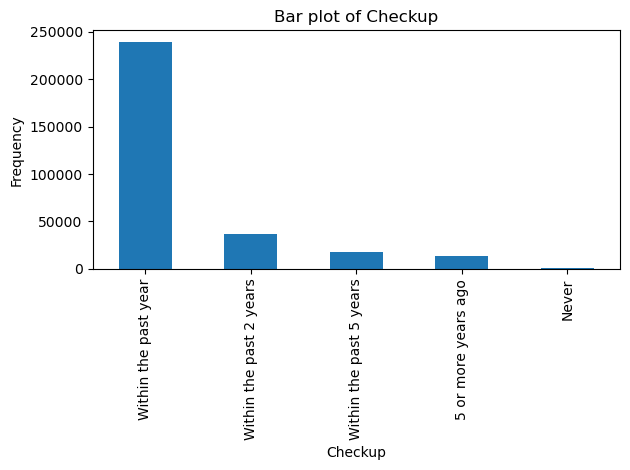

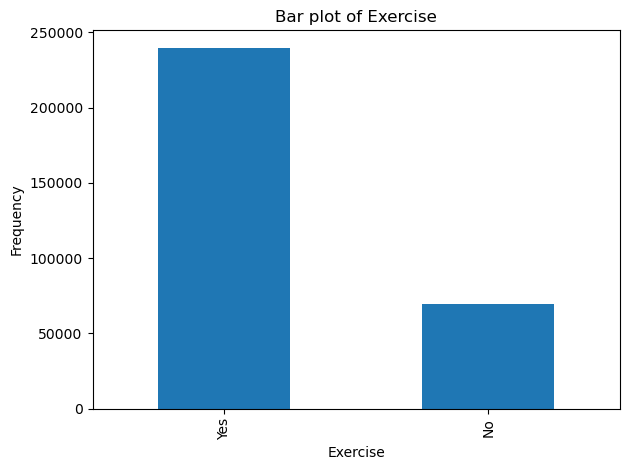

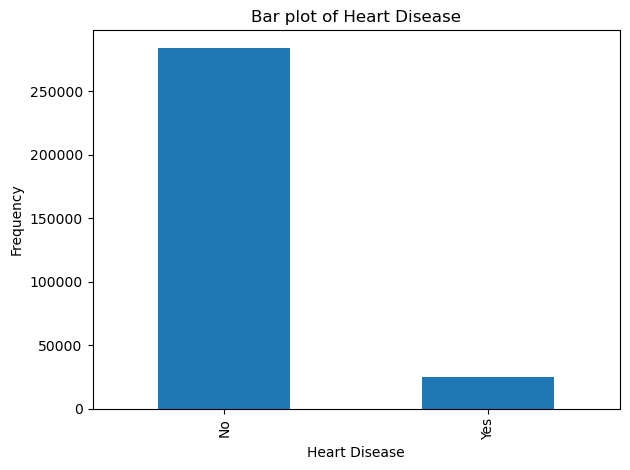

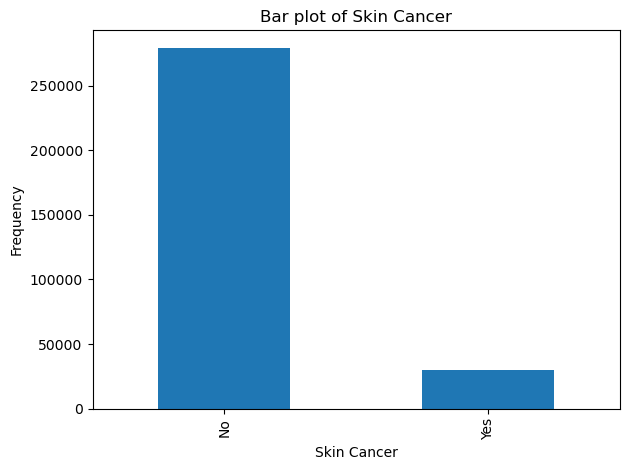

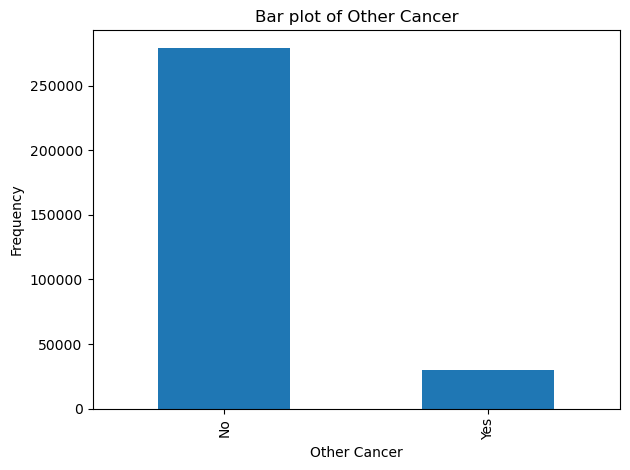

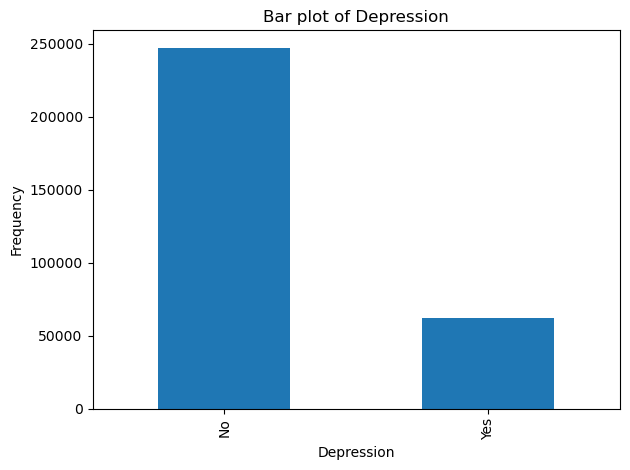

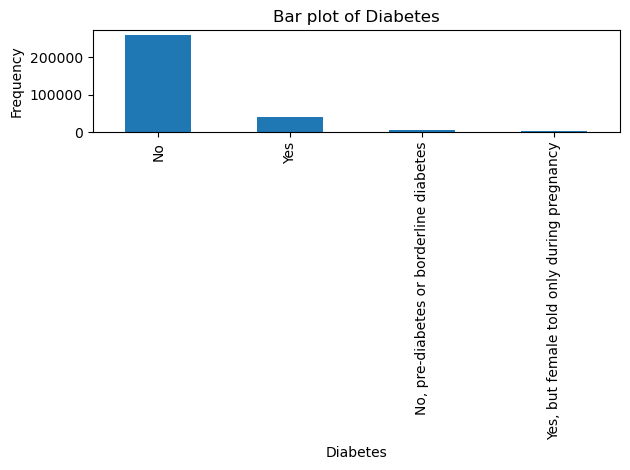

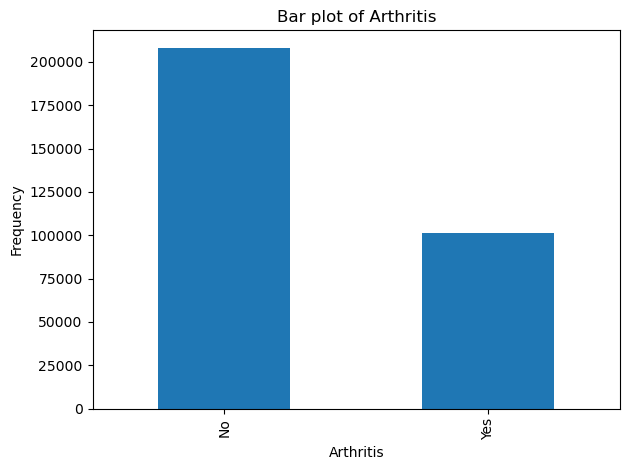

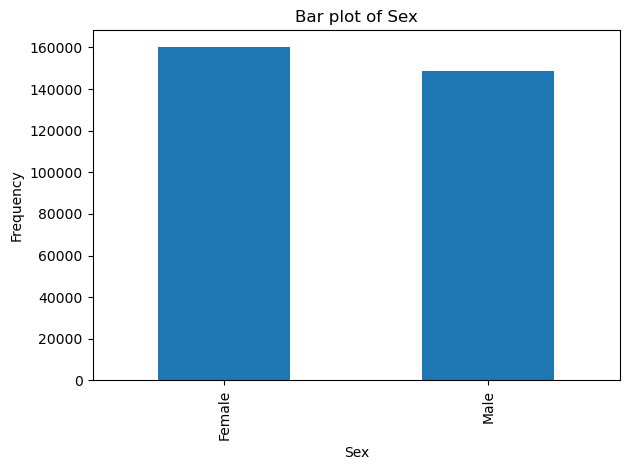

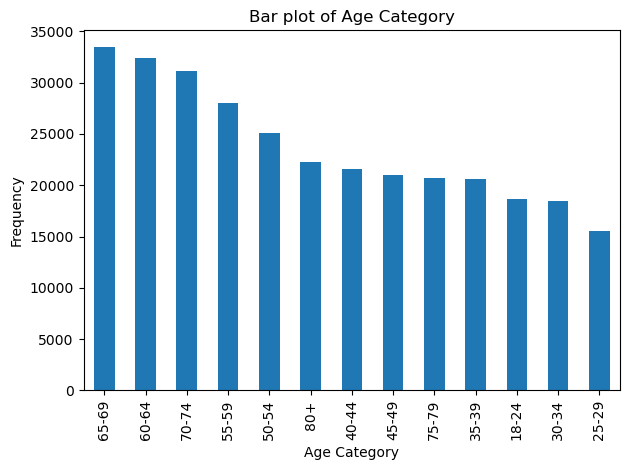

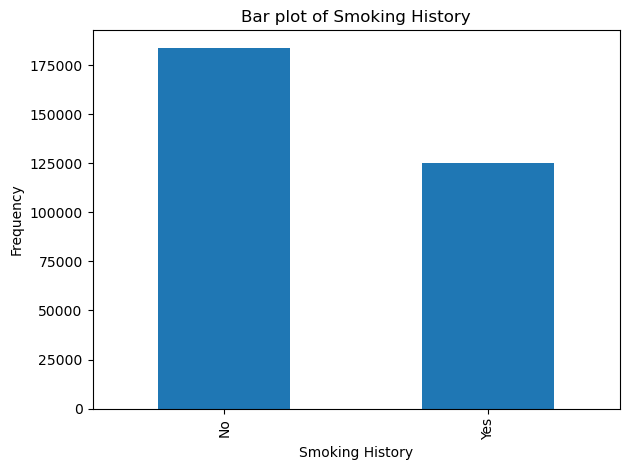

In [16]:
categorial_columns = [
    "General_Health",
    "Checkup",
    "Exercise",
    "Heart_Disease",
    "Skin_Cancer",
    "Other_Cancer",
    "Depression",
    "Diabetes",
    "Arthritis",
    "Sex",
    "Age_Category",
    "Smoking_History",
]

for categorial_column in categorial_columns:
    label = " ".join(categorial_column.split("_"))
    # The one-liner to plot the bar plot was found:
    # https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
    df[categorial_column].value_counts().plot(kind="bar")
    plt.title(f"Bar plot of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.tight_layout()  # Use tight layout to prevent labels being cut off in the saved image
    plt.savefig(f"{path}{categorial_column}_bar_plot.png")
    plt.show()

Some observations about all the variables:

**General_Health**: Most people answered this question with 'Very Good' or 'Good', while only a few answered 'Poor'. We note that this is subjective and thus might not be a good indicator of heart disease.

**Checkup**: Most people had a checkup in the last year. Note that a recent checkup can cause heart disease to be found earlier, but that still does not say anything about the actual health of that person.

**Exercise**: The majority reported to engage in exersice. According to our literature, not engaging in exercise might be a indicator for heart disease.

**Heart_Disease**: This shows us that only a small percentage of the people in the dataset actually have heart disease.

**Skin_Cancer**: A small minority reported having skin cancer. As far as literature tells us, skin cancer does not have a correlation to heart disease.

**Other_Cancer**: Just like skin cancer, other cancer does not have a correlation to heart disease.

**Depression**: According to literature, depression may have a relation with heart disease. In the dataset a small amount of people reported having depression.

**Diabetes**: Diabetes is known to cause a higher probability to get heart disease. In the dataset a small amount of people reported having diabetes.

**Arthritis**: About one third of the people from the survey has arthritis.

**Sex**: The dataset is pretty much divided in half.

**Age_Category**: Most people filling in the survey are between 45 and 69. The age could be a good indicator for heart disease (according to literature).

**Height\_(cm)**: The distribution of height has two peaks, most likely for male and female. The average length of the people in the dataset is 1.70m.

**Weight\_(kg)**: The average weight is 83.59kg.

**BMI**: The average BMI is 28.8. This is considered unhealthy.

**Smoking_History**: Most people do not have a history of smoking, but there are a lot of people who do.

**Alcohol_Consumption**:

**Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption**: The x-axis does not tell us much about the amount of food eaten, so we
are not able to make any statements about these graphs.
